# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


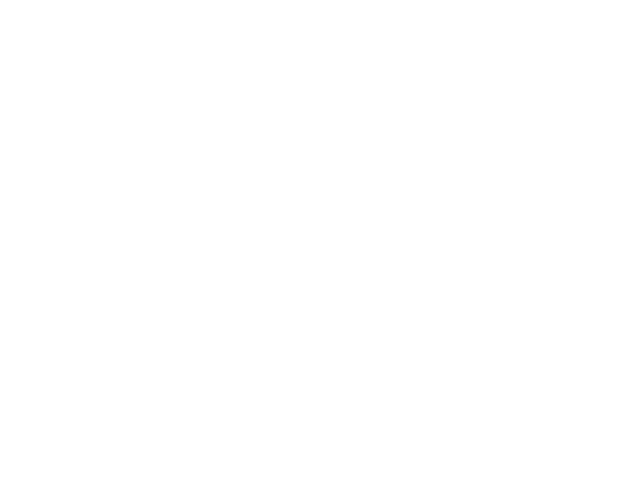

Text(15.49900185541787, 0.5, 'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

plt.figure()
gspec = gridspec.GridSpec(2, 2)

p1 = plt.subplot(gspec[0,0])
p2 = plt.subplot(gspec[0,1])
p3 = plt.subplot(gspec[1,0])
p4 = plt.subplot(gspec[1,1])

p1.hist(x1, density=True, bins=20, alpha=0.5)
p2.hist(x2, density=True, bins=20, alpha=0.5)
p3.hist(x3, density=True, bins=20, alpha=0.5)
p4.hist(x4, density=True, bins=20, alpha=0.5)

p2.annotate('n = {}'.format(100), [15,0.1])


# plot the histograms
# plt.figure(figsize=(9,3))
# ax1 = plt.subplot(2,2,1)
# plt.hist(x1, density=True, bins=20, alpha=0.5)
# plt.axis([-7,21,0,0.6])
# ax2 = plt.subplot(2,2,2)
# plt.hist(x2, density=True, bins=20, alpha=0.5)
# plt.axis([-7,21,0,0.6])
# ax3 = plt.subplot(2,2,3)
# plt.hist(x3, density=True, bins=20, alpha=0.5)
# plt.axis([-7,21,0,0.6])
# ax4 = plt.subplot(2,2,4)
# plt.hist(x4, density=True, bins=20, alpha=0.5);
# plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.animation as animation

n = 100
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

In [3]:
def update(curr):
    if curr == n: 
        a.event_source.stop()
    
    steps = range(100, 10100, 100)
    curr = steps[curr]

    p1 = plt.subplot(gspec[0,0])
    p2 = plt.subplot(gspec[0,1])
    p3 = plt.subplot(gspec[1,0])
    p4 = plt.subplot(gspec[1,1])

    p1.cla()
    p1.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
    p1.annotate('n = {}'.format(curr), [x1.mean()+1.5, 0.8])
    bins = np.arange(-6, 2, 0.5)
    p1.set_ylim([0,1])
    p1.hist(x1[:curr], density=True, bins=bins, alpha=0.5)
    
    p2.cla()
    p2.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
    p2.annotate('n = {}'.format(curr), [x2.mean()+1.5, 0.8])
    bins = np.arange(0, 16, 0.5)
    p2.set_ylim([0,1])
    p2.hist(x2[:curr], density=True, bins=bins, alpha=0.5)
    
    p3.cla()
    p3.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
    p3.annotate('n = {}'.format(curr), [x3.mean()+1.5, 0.8])
    bins = np.arange(7, 16, 0.5)
    p3.set_ylim([0,1])
    p3.hist(x3[:curr], density=True, bins=bins, alpha=0.5)
    
    p4.cla()
    p4.text(x4.mean()-1.5, 0.5, 'x4\nUniform')
    p4.annotate('n = {}'.format(curr), [x4.mean()+1.5, 0.8])
    bins = np.arange(14, 21, 0.5)
    p4.set_ylim([0,1])
    p4.hist(x4[:curr], density=True, bins=bins, alpha=0.5)
    
    


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

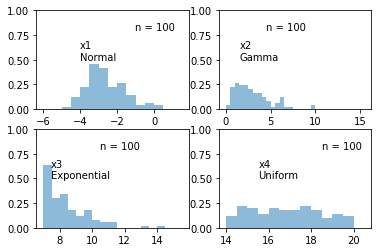

In [5]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

a.save('distributions.gif', writer = 'imagemagick', dpi=80)